Design and implement a CNN model (with 4 layers of convolutions) to classify a multi-category image dataset.
Use the concept of regularization and dropout while designing the CNN model. Use the Fashion MNIST dataset.
Record the Training accuracy and Test accuracy corresponding to the following architectures of the model with both L2 (or L1) or Dropout.

In [ ]:
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [ ]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')


In [ ]:
train_x /= 255
test_x /= 255

train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [ ]:

model = Sequential()

model.add(Conv2D(256, (3,3), input_shape=(28,28,1), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

model.add(Dense(10, kernel_regularizer=l2(0.01)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.fit(train_x, train_y_one_hot, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 471s 249ms/step - accuracy: 0.6150 - loss: 1.5780
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 497s 247ms/step - accuracy: 0.7456 - loss: 0.9940
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 502s 247ms/step - accuracy: 0.7614 - loss: 0.9488
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 455s 243ms/step - accuracy: 0.7667 - loss: 0.9340
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 454s 242ms/step - accuracy: 0.7752 - loss: 0.9103


313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.7696 - loss: 0.9272
Test loss: 0.9338753819465637
Test accuracy: 0.767799973487854
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step
9


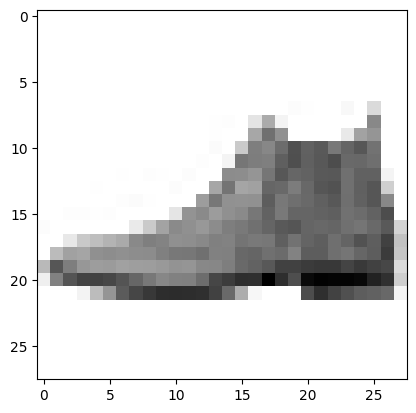

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

predictions = model.predict(test_x)
print(np.argmax(np.round(predictions[0])))

plt.imshow(test_x[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
